In [54]:
from seq2sec.apply import Protein
from seq2sec.model import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [60]:
# load model and set to eval
net = load('./models/teste-uncloss-ss3_ss4_buried.pth') 
# net = load('./models/resnet_mt_3-4_cath95.pth')

In [68]:
# read fasta
p = Protein("./fasta_sequences/start2fold/P0A7Y4.fasta")
p.predict_with(net.predict)

In [69]:
p.seq

'MLKQVEIFTDGSCLGNPGPGGYGAILRYRGREKTFSAGYTRTTNNRMELMAAIVALEALKEHCEVILSTDSQYVRQGITQWIHNWKKRGWKTADKKPVKNVDLWQRLDAALGQHQIKWEWVKGHAGHPENERCDELARAAAMNPTLEDTGYQVEV'

In [70]:
p.prediction['ss_cons_3_label']

'CCCCCCEECCCCCCCCCCCCCCCCHEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEECCCCCCEECCCCCEEECCCCCCCCCCCCCCCCCCCCCHCCCCCCCCCCCCEECCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEHCC'

In [71]:
p.prediction['ss_cons_4_label']

'HHHHHHEEEHHHHHEHHHHHHHHEEEEHHHHHHHHHHHHHHHHHHHHHHHHHEEHHHHHHHHHHEEHHHHHHEEHHHHHHEEHHHHHHHHEHHHHHHHHHHHHEEHHHHHHHHHHEEEHEEHHHHHHHHHHHHHHHEHHHHHHHHHHHHHEEEEE'

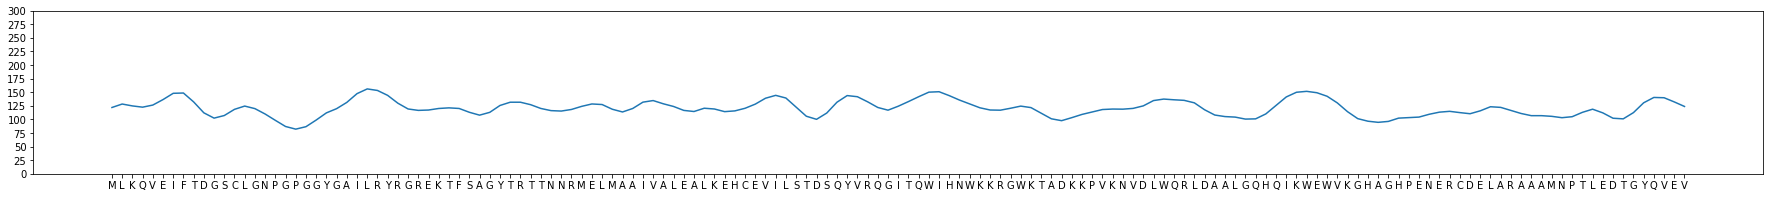

In [72]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3))
plt.plot(p.prediction['buriedI_abs']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,301,25));

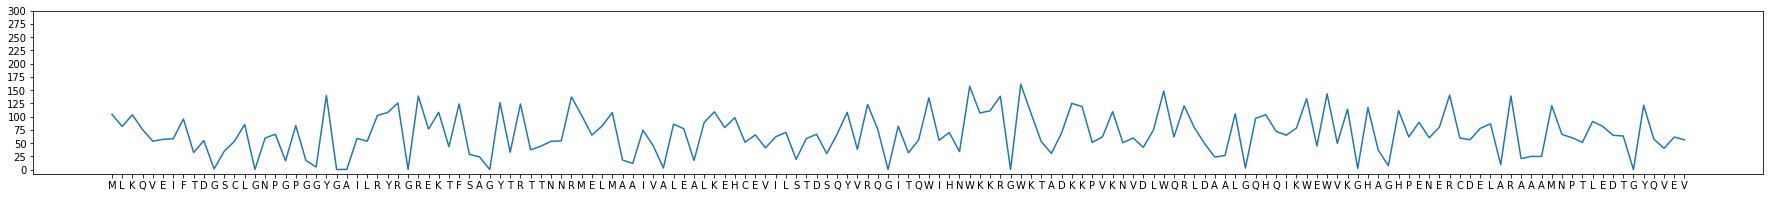

In [73]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3))
plt.plot(p.asa());
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,301,25));

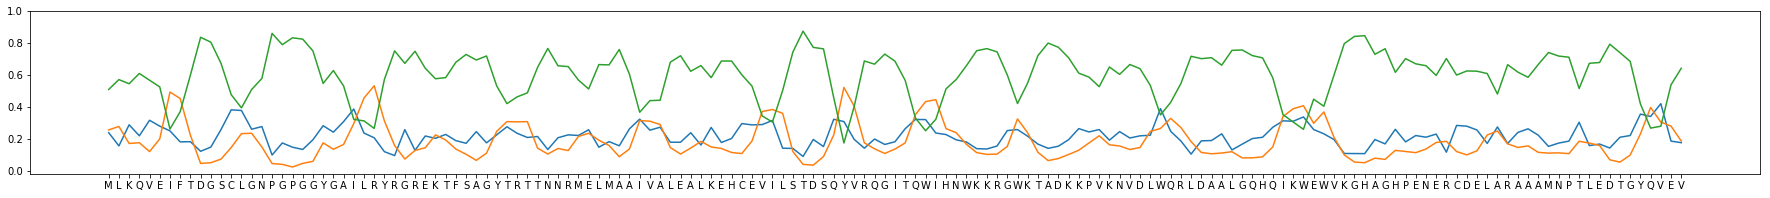

In [74]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
plt.plot(p.probabilities['ss_cons_3_label']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,1.01,0.2));

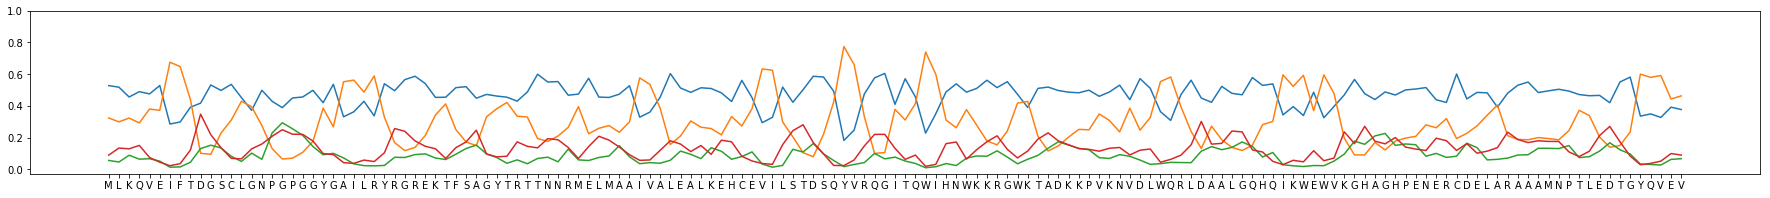

In [75]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
plt.plot(p.probabilities['ss_cons_4_label']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,1.01,0.2));

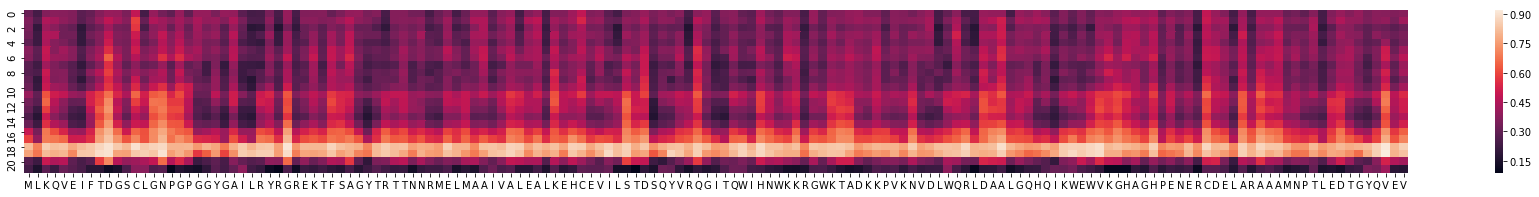

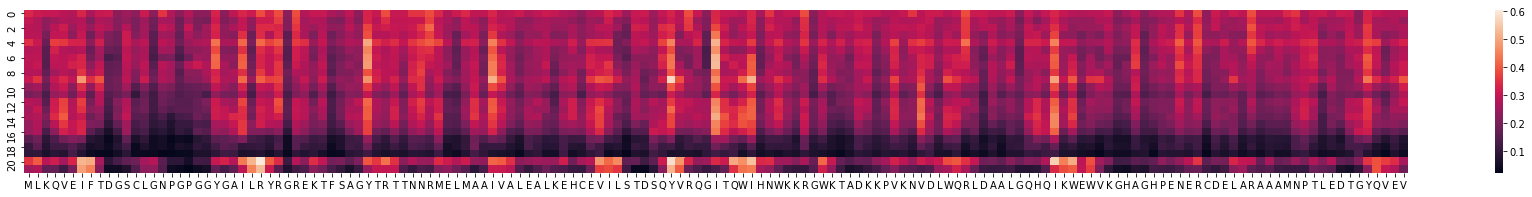

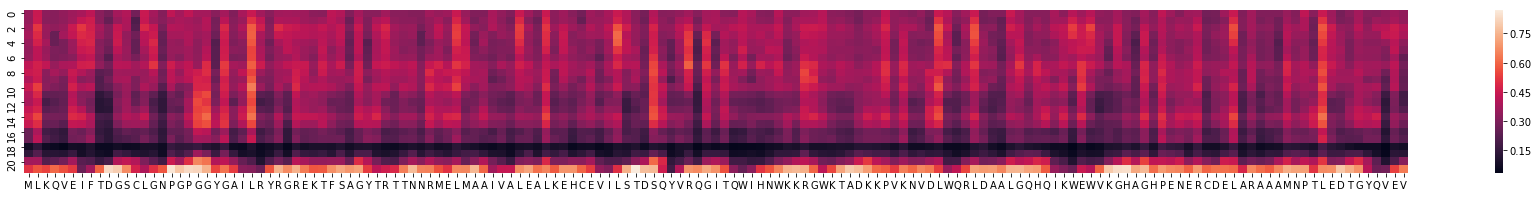

In [76]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_3_label'][0]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_3_label'][1]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_3_label'][2]), xticklabels=list(p.seq));

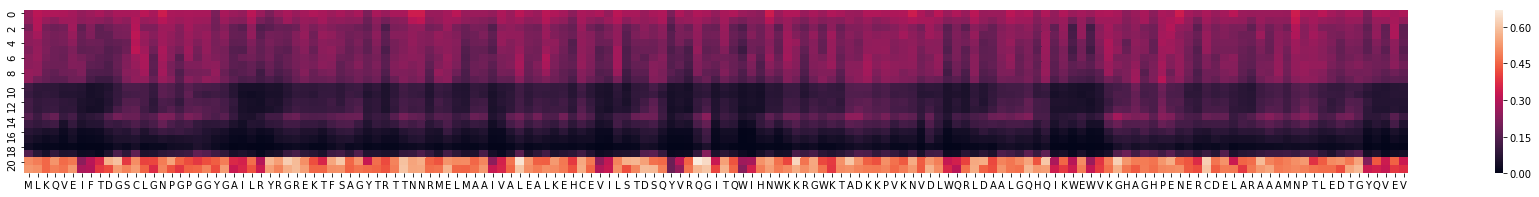

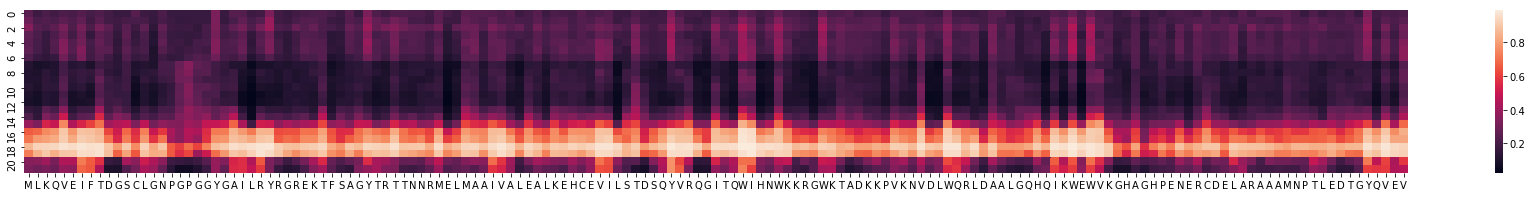

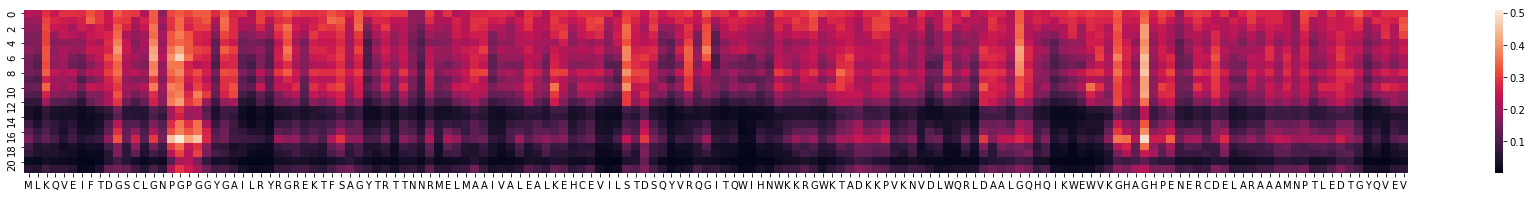

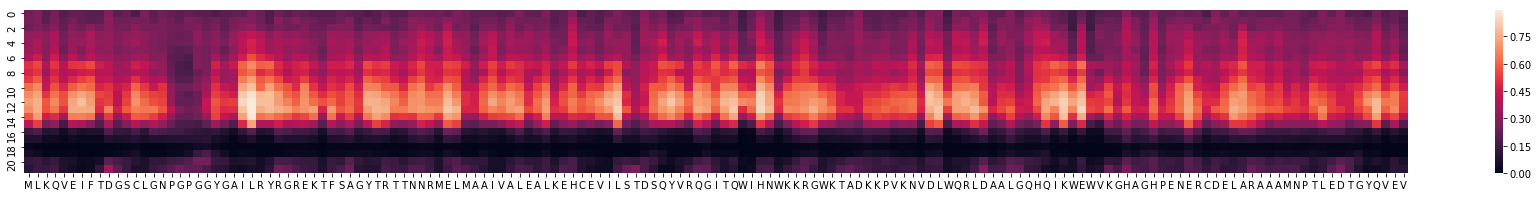

In [77]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][0]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][1]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][2]), xticklabels=list(p.seq));
plt.subplots(figsize=(len(p.seq)*0.20, 3));
sns.heatmap(np.transpose(p.steps['ss_cons_4_label'][3]), xticklabels=list(p.seq));

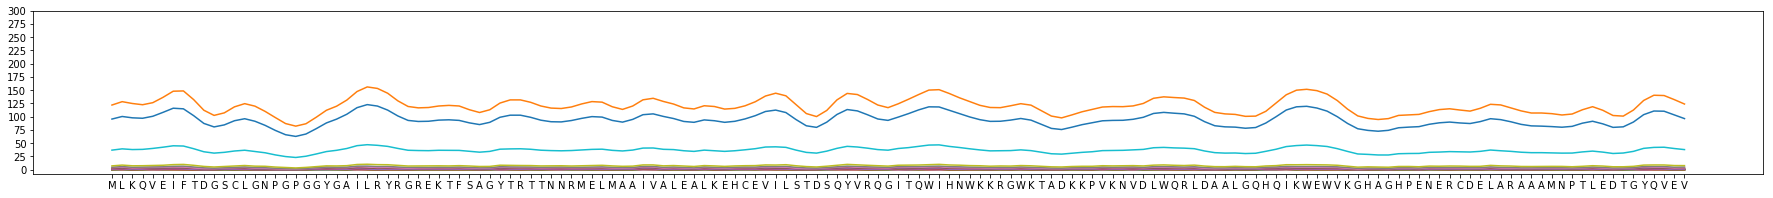

In [78]:
%matplotlib inline
plt.subplots(figsize=(len(p.seq)*0.20, 3));
plt.plot(p.steps['buriedI_abs']);
plt.xticks(range(len(p.seq)),list(p.seq));
plt.yticks(np.arange(0,301,25));

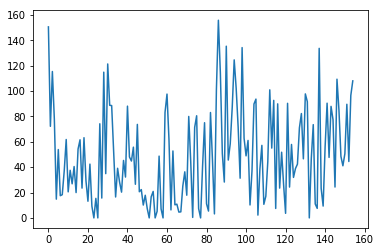

In [6]:
plt.plot(p.asa())